In [18]:
import pandas as pd
import missingno as msgn

In [2]:
df_weather=pd.read_csv("final_weather_data")

In [3]:
df_flight=pd.read_csv("main_flights_csv")

In [7]:
df_flight.drop(labels=["Unnamed: 0"],axis=1,inplace=True)

In [9]:
df_weather.drop(labels=["Unnamed: 0"],axis=1,inplace=True)

In [10]:
df_flight

,Origin,Dest,FlightDate,DepTime,DepDel15,CRSDepTime,CRSArrTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,ArrDel15,ArrDelayMinutes,Month
0,FAI,SEA,2016-01-01,106.0,0.0,115,555,0.0,11630,14747,600.0,0.0,5.0,1
1,SEA,FAI,2016-01-01,2314.0,0.0,2320,221,0.0,14747,11630,130.0,0.0,0.0,1
2,FAI,SEA,2016-01-01,625.0,0.0,630,1110,0.0,11630,14747,1127.0,1.0,17.0,1
3,FAI,SEA,2016-01-01,1938.0,1.0,1745,2230,113.0,11630,14747,25.0,1.0,115.0,1
4,SEA,FAI,2016-01-01,1421.0,1.0,1355,1648,26.0,14747,11630,1652.0,0.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831820,MCI,DFW,2017-12-31,1827.0,1.0,1530,1721,177.0,13198,11298,2034.0,1.0,193.0,12
7831821,PDX,LAS,2017-12-31,1725.0,0.0,1730,1938,0.0,14057,12889,1951.0,0.0,13.0,12
7831822,PHX,TPA,2017-12-31,47.0,0.0,50,633,0.0,14107,15304,629.0,0.0,0.0,12
7831823,DFW,MCI,2017-12-31,1436.0,1.0,1255,1431,101.0,11298,13198,1746.0,1.0,195.0,12


In [11]:
df_weather

,windspeedKmph,windspeedMiles,WindGustKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,tempF,WindChillF,humidity,time,date,airport
0,11,7,17,318,176,0.1,10,1023,100,47,49,46,91,0,2016-01-01,ATL
1,13,8,22,317,176,0.0,10,1023,100,44,46,42,92,100,2016-01-01,ATL
2,14,9,26,315,122,0.0,10,1023,100,41,43,38,92,200,2016-01-01,ATL
3,16,10,30,314,122,0.0,10,1023,100,38,40,33,93,300,2016-01-01,ATL
4,17,10,30,314,122,0.0,10,1023,100,38,40,33,93,400,2016-01-01,ATL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263155,26,16,27,296,113,0.0,10,1014,0,57,67,67,70,1900,2017-09-30,SFO
263156,26,16,27,298,113,0.0,10,1014,0,58,67,67,71,2000,2017-09-30,SFO
263157,26,16,27,300,113,0.0,10,1014,0,58,67,67,73,2100,2017-09-30,SFO
263158,23,14,25,302,113,0.0,10,1014,0,58,66,66,74,2200,2017-09-30,SFO


In [12]:
time_columns=["DepTime","CRSDepTime","CRSArrTime","ArrTime"]

In [14]:
for x in time_columns:
    time=[]
    for y in df_flight[x]:
        y=int(y)
        z=y%100
        if z>30:
            y=(y+100)-z
        elif z<=30:
            y=y-z
        elif y==2400:
            y=0
        
        time.append(y)
    
    df_flight[x] = time
            

In [15]:
df_flight

,Origin,Dest,FlightDate,DepTime,DepDel15,CRSDepTime,CRSArrTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,ArrDel15,ArrDelayMinutes,Month
0,FAI,SEA,2016-01-01,100,0.0,100,600,0.0,11630,14747,600,0.0,5.0,1
1,SEA,FAI,2016-01-01,2300,0.0,2300,200,0.0,14747,11630,100,0.0,0.0,1
2,FAI,SEA,2016-01-01,600,0.0,600,1100,0.0,11630,14747,1100,1.0,17.0,1
3,FAI,SEA,2016-01-01,2000,1.0,1800,2200,113.0,11630,14747,0,1.0,115.0,1
4,SEA,FAI,2016-01-01,1400,1.0,1400,1700,26.0,14747,11630,1700,0.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831820,MCI,DFW,2017-12-31,1800,1.0,1500,1700,177.0,13198,11298,2100,1.0,193.0,12
7831821,PDX,LAS,2017-12-31,1700,0.0,1700,2000,0.0,14057,12889,2000,0.0,13.0,12
7831822,PHX,TPA,2017-12-31,100,0.0,100,700,0.0,14107,15304,600,0.0,0.0,12
7831823,DFW,MCI,2017-12-31,1500,1.0,1300,1500,101.0,11298,13198,1800,1.0,195.0,12


In [16]:
merged_df=pd.merge(df_weather,df_flight,how="inner",left_on=["airport","time","date"],right_on=["Origin","DepTime","FlightDate"])

In [17]:
merged_df

,windspeedKmph,windspeedMiles,WindGustKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,...,DepDel15,CRSDepTime,CRSArrTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,ArrDel15,ArrDelayMinutes,Month
0,18,11,28,315,122,0.0,10,1024,100,38,...,0.0,600,700,6.0,10397,13204,700,0.0,8.0,1
1,18,11,28,315,122,0.0,10,1024,100,38,...,0.0,600,800,1.0,10397,14100,800,0.0,0.0,1
2,18,11,26,317,122,0.0,10,1024,100,38,...,0.0,700,1000,0.0,10397,14747,900,0.0,0.0,1
3,18,11,26,317,122,0.0,10,1024,100,38,...,0.0,700,900,0.0,10397,13303,900,0.0,1.0,1
4,18,11,26,317,122,0.0,10,1024,100,38,...,0.0,700,900,10.0,10397,14771,900,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804989,20,13,22,303,113,0.0,10,1014,0,58,...,1.0,2300,700,15.0,14771,12264,700,0.0,0.0,9
4804990,20,13,22,303,113,0.0,10,1014,0,58,...,0.0,2300,800,0.0,14771,12478,800,0.0,0.0,9
4804991,20,13,22,303,113,0.0,10,1014,0,58,...,0.0,2300,800,0.0,14771,12478,800,0.0,0.0,9
4804992,20,13,22,303,113,0.0,10,1014,0,58,...,0.0,2300,700,0.0,14771,14100,700,0.0,0.0,9


AxesSubplot(0.125,0.125;0.698618x0.755)
windspeedKmph      0
windspeedMiles     0
WindGustKmph       0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
tempF              0
WindChillF         0
humidity           0
time               0
date               0
airport            0
Origin             0
Dest               0
FlightDate         0
DepTime            0
DepDel15           0
CRSDepTime         0
CRSArrTime         0
DepDelayMinutes    0
OriginAirportID    0
DestAirportID      0
ArrTime            0
ArrDel15           0
ArrDelayMinutes    0
Month              0
dtype: int64


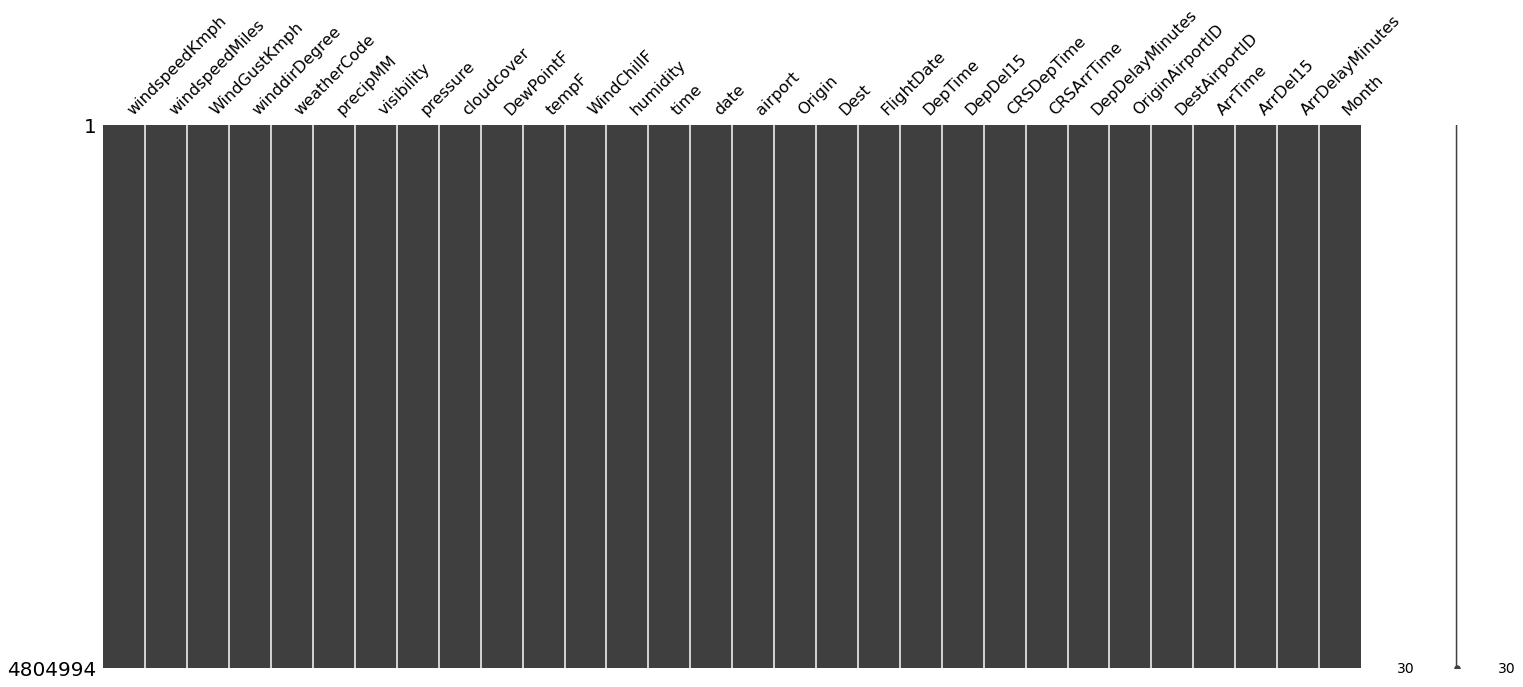

In [21]:
print(msgn.matrix(merged_df))
print(merged_df.isnull().sum())

In [22]:
merged_df.to_csv("Merged_weather_flight")